Stock market portfolio optimization is a process used to manage investments in a way that maximizes returns while minimizing risk. Here's a breakdown of the key concepts and steps involved:
Key Concepts:
1. Price Trends:

These are the general directions in which stock prices are moving over a period of time. Analyzing these trends helps in predicting future price movements.

2. Expected Returns:

This refers to the anticipated profit or loss from an investment. It's calculated based on historical data and is a key factor in deciding which stocks to include in a portfolio.

3. Volatility:

Volatility measures the degree of variation in a stock's price over time. Higher volatility means more risk, as the price can fluctuate widely.

4. Correlations:

Correlation measures how stocks move in relation to one another. A well-diversified portfolio includes stocks that are not highly correlated, meaning they do not all move in the same direction at the same time, reducing overall risk.

5. Modern Portfolio Theory (MPT):

This is a mathematical framework for assembling a portfolio of assets in a way that maximizes expected return for a given level of risk. MPT focuses on selecting stocks that, when combined, create a balanced and efficient portfolio.

6. Efficient Frontier:

The efficient frontier is a curve that represents the set of portfolios that offer the highest expected return for a given level of risk. Portfolios on this frontier are considered optimal.
7. Sharpe Ratio:

The Sharpe ratio is a measure of risk-adjusted return. It helps identify the portfolio that provides the best return for the level of risk taken. The higher the Sharpe ratio, the better the risk-adjusted return.

Steps in Portfolio Optimization:

1. Data Collection:

Collect historical and real-time stock market data to analyze trends, returns, volatility, and correlations between different stocks.

2. Analysis and Calculation:

Calculate expected returns, volatility, and correlations for the selected stocks.
Use these calculations to determine the optimal combination of stocks.

3. Constructing the Portfolio:

Apply Modern Portfolio Theory to select the best mix of stocks that maximizes returns while minimizing risk.
Plot the efficient frontier to visualize the optimal portfolios.

4. Optimization:

Identify the portfolio with the highest Sharpe ratio to ensure the best risk-adjusted return. Allocate investments according to the optimization results to achieve long-term investment goals.

Getting Started with Data Collection:
To begin optimizing a stock market portfolio, collect real-time stock market data. This is done using the yfinance API, which allows you to access financial data for various stocks. Retrieve data like historical prices, dividends, and more, which will be used in the analysis and optimization process. By analyzing this data, apply the principles of Modern Portfolio Theory to construct an efficient portfolio that aligns with investment goals.








Collecting data for some popular companies

In [6]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [7]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
# tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

tickers = ["NVDA.NE", "META", "TSLA", "INTC.SN"]

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = data.reset_index()

# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Date']"

In [9]:
stock_data = pd.read_csv("stock_data.csv")
stock_data.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-18 00:00:00+00:00,META,301.929535,302.549988,303.600006,297.799988,298.190002,14234200.0
1,2023-09-18 00:00:00+00:00,NVDA.NE,10.466874,10.470000,10.537500,10.092500,10.182500,789820.0
2,2023-09-18 00:00:00+00:00,TSLA,265.279999,265.279999,271.440002,263.760010,271.160004,101543300.0
3,2023-09-19 00:00:00+00:00,META,304.444397,305.070007,306.170013,299.809998,302.480011,15924400.0
4,2023-09-19 00:00:00+00:00,NVDA.NE,10.371901,10.375000,10.477500,10.257500,10.452500,310272.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace= True)

In [11]:
stock_data.head()

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-09-18 00:00:00+00:00,META,301.929535,302.549988,303.600006,297.799988,298.190002,14234200.0
2023-09-18 00:00:00+00:00,NVDA.NE,10.466874,10.470000,10.537500,10.092500,10.182500,789820.0
2023-09-18 00:00:00+00:00,TSLA,265.279999,265.279999,271.440002,263.760010,271.160004,101543300.0
2023-09-19 00:00:00+00:00,META,304.444397,305.070007,306.170013,299.809998,302.480011,15924400.0
2023-09-19 00:00:00+00:00,NVDA.NE,10.371901,10.375000,10.477500,10.257500,10.452500,310272.0


looking at performance over time

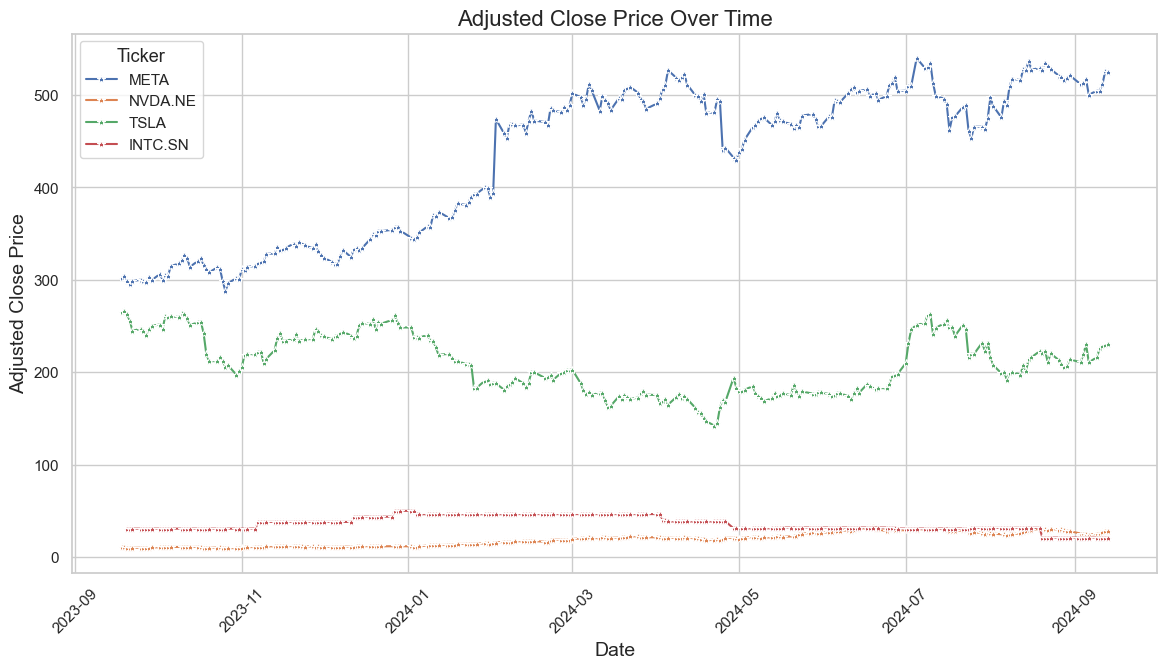

In [18]:
plt.figure(figsize= (14, 7))
sns.set(style= 'whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='*')

plt.title('Adjusted Close Price Over Time', fontsize= 16)
plt.xlabel('Date', fontsize= 14)
plt.ylabel('Adjusted Close Price', fontsize= 14)
plt.legend(title= 'Ticker', title_fontsize= '13', fontsize= '11')
plt.grid(True)

plt.xticks(rotation= 45)

plt.show()